# Gaussifier

In [1]:
%matplotlib inline
import time
import numpy as np
from sklearn.externals import joblib
from gaussifier import Gaussifier

## One complete example

In [2]:
# Generating random training data
train = np.random.rand(500)
valid = np.random.rand(250)

# Fitting the Gaussifier
g = Gaussifier()
g.fit(train, nbins=0, maxnbins=51, sorted=False)

# Transform and inverse transform the training data
train_t = g.transform(train)
train_i = g.inverse_transform(train_t)

# Check if the output of inverse is the same as the original input
assert np.allclose(train, train_i)

# Saving and loading the fitted Gaussifier
joblib.dump(g, '.aux/gaussifier.pkl')
g = joblib.load('.aux/gaussifier.pkl')

# Use the gaussifier to transform validation data
valid_t = g.transform(valid)
valid_i = g.inverse_transform(valid_t)

### Visualization on training data

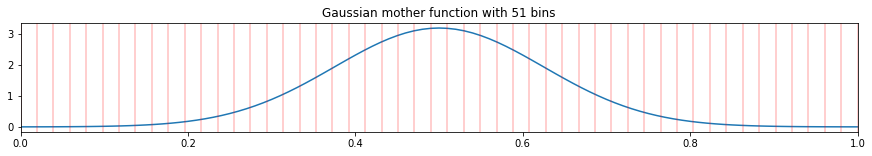

In [3]:
# In the figure bellow, we can see the Gaussian function that we use as a template 
# to learn the transform function. More bins will mean "bigger resolution" of the 
# learned transform function.
g.display_mother_function()

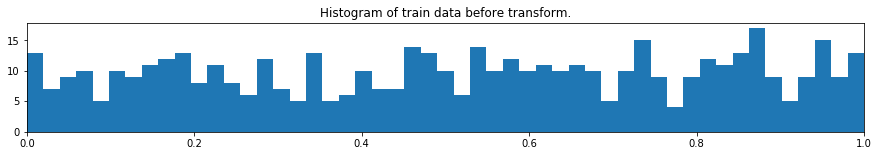

In [4]:
g.plot_hist(train, g.nbins, title='Histogram of train data before transform.')         

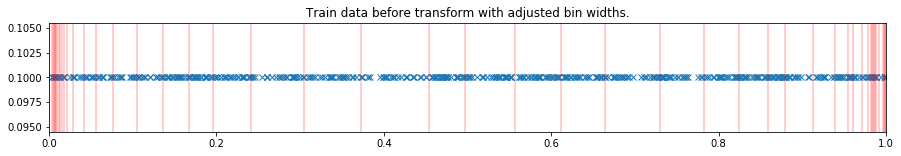

In [5]:
# Bin widths need to be adjusted so the amount of data points in each bin is according to the mother function.
g.plot_data_and_bins(train, bin_frontiers=g.rbf, title='Train data before transform with adjusted bin widths.')

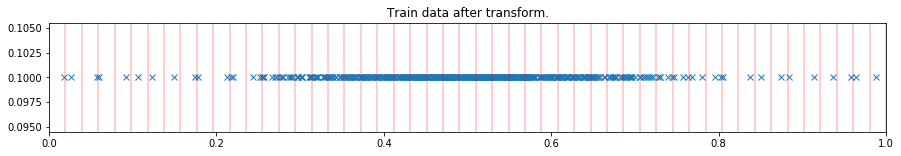

In [6]:
# After the transformation, the bins have their orignal widths, but the data changed.
g.plot_data_and_bins(train_t, bin_frontiers=g.dbf, title='Train data after transform.')

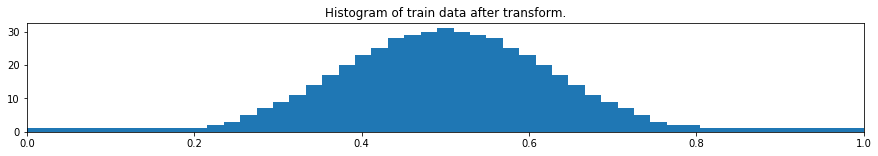

In [7]:
# The change of the data means the change of the distribution, which is now Gaussian.
g.plot_hist(train_t, g.nbins, title='Histogram of train data after transform.') 

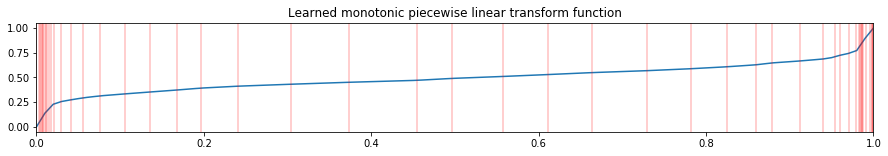

In [8]:
# Learned transform function is saved in the Gaussifier object to enable the transformation 
# of other data which we assume to be from the same distribution as training data.
g.display_transform_function()

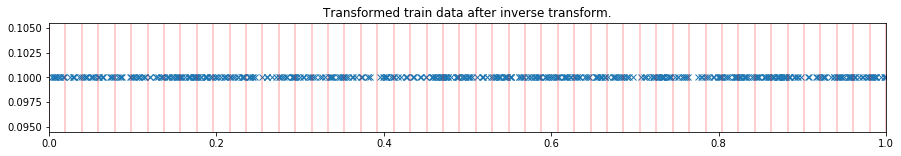

In [9]:
# Inverse transform will yield exactly the same vector as the input to the transform()
g.plot_data_and_bins(train_i, bin_frontiers=g.dbf, title='Transformed train data after inverse transform.')

### Visualization on validation data

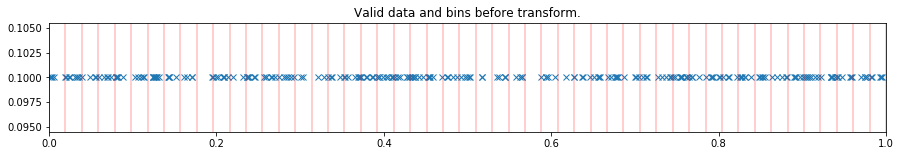

In [10]:
# In the machine learning scenario, we will often have less validation data than training data.
g.plot_data_and_bins(valid, bin_frontiers=g.dbf, title='Valid data and bins before transform.')

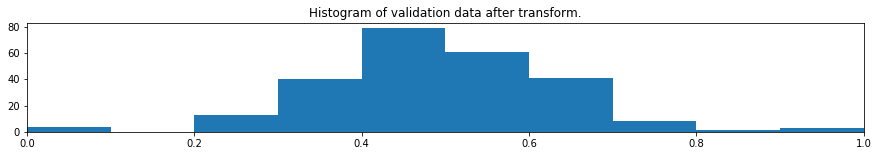

In [11]:
# But if the assumption we made about its distribution is true, the result after transformation
# will also have Gaussian distribution.
g.plot_hist(valid_t, nbins=None, title='Histogram of validation data after transform.') 

## Profiling

In [12]:
# Creatin multiple sizes of unsroted and sorted random data
ud04 = np.random.rand(int(1e04))
sd04 = np.sort(ud04)
ud06 = np.random.rand(int(1e06))
sd06 = np.sort(ud06)
ud08 = np.random.rand(int(1e08))
sd08 = np.sort(ud08)

scenarios = [('1e04', ud04, False, 15),
             ('1e04', sd04, True,  15),
             ('1e04', ud04, False, 51),
             ('1e04', sd04, True,  51),
             ('1e04', ud04, False, 333),
             ('1e04', sd04, True,  333),
             ('1e06', ud06, False, 15),
             ('1e06', sd06, True,  15),
             ('1e06', ud06, False, 51),
             ('1e06', sd06, True,  51),
             ('1e06', ud06, False, 333),
             ('1e06', sd06, True,  333),
             ('1e08', ud08, False, 15),
             ('1e08', sd08, True,  15),
             ('1e08', ud08, False, 51),
             ('1e08', sd08, True,  51),
             ('1e08', ud08, False, 333),
             ('1e08', sd08, True,  333)]

# Looping through multiple scenarios
for n, data, srtd, nbins in scenarios:
    g = Gaussifier(validate_input=False)
    s1 = time.time()
    g.fit(data, nbins=nbins, sorted=srtd)
    s2 = time.time()
    transformed = g.transform(data)
    s3 = time.time()
    inversed = g.inverse_transform(transformed)
    s4 = time.time()
    print('### N: {}, bins: {}, time: fit({}) {:.2f}ms | transform {:.2f}ms | inverse {:.2f}ms'.format(
        n, g.nbins, 'sorted' if srtd else 'unsorted', (s2-s1)*1000, (s3-s2)*1000, (s4-s3)*1000))

### N: 1e04, bins: 15, time: fit(unsorted) 24.72ms | transform 0.48ms | inverse 0.47ms
### N: 1e04, bins: 15, time: fit(sorted) 28.21ms | transform 0.53ms | inverse 0.35ms
### N: 1e04, bins: 51, time: fit(unsorted) 82.00ms | transform 1.15ms | inverse 1.13ms
### N: 1e04, bins: 51, time: fit(sorted) 89.35ms | transform 1.49ms | inverse 1.00ms
### N: 1e04, bins: 333, time: fit(unsorted) 599.57ms | transform 5.98ms | inverse 5.55ms
### N: 1e04, bins: 333, time: fit(sorted) 627.47ms | transform 5.41ms | inverse 5.62ms
### N: 1e06, bins: 15, time: fit(unsorted) 109.71ms | transform 60.06ms | inverse 58.70ms
### N: 1e06, bins: 15, time: fit(sorted) 28.92ms | transform 33.86ms | inverse 34.45ms
### N: 1e06, bins: 51, time: fit(unsorted) 173.00ms | transform 128.31ms | inverse 118.22ms
### N: 1e06, bins: 51, time: fit(sorted) 86.58ms | transform 96.16ms | inverse 101.27ms
### N: 1e06, bins: 333, time: fit(unsorted) 670.25ms | transform 568.19ms | inverse 548.69ms
### N: 1e06, bins: 333, time: 

## Different input distributions

### Beta distribution -> Gaussian distribution

In [13]:
# Generate random sample from beta distribution
train_beta = np.random.beta(1,0.60,30000)
valid_beta = np.random.beta(1,0.60,5000)

# Fitting the Gaussifier
g = Gaussifier()
g.fit(train_beta, nbins=0)
train_b_t = g.transform(train_beta)
valid_b_t = g.transform(valid_beta)

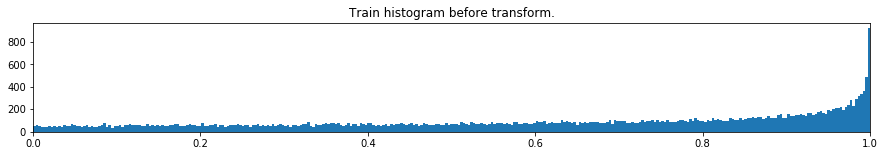

In [14]:
g.plot_hist(train_beta, g.nbins, title='Train histogram before transform.')  

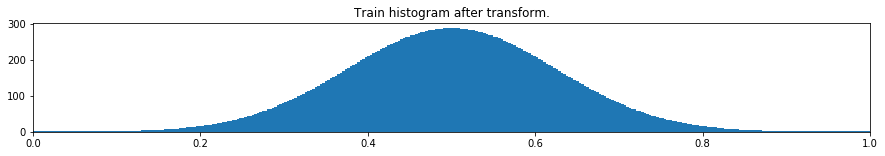

In [15]:
g.plot_hist(train_b_t, g.nbins, title='Train histogram after transform.') 

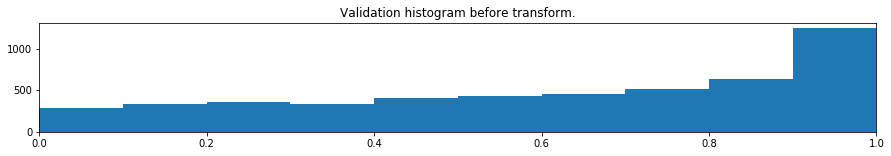

In [16]:
g.plot_hist(valid_beta, None, title='Validation histogram before transform.') 

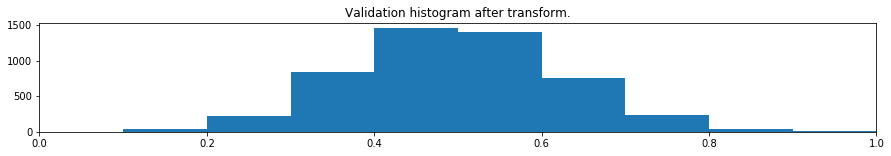

In [17]:
g.plot_hist(valid_b_t, None, title='Validation histogram after transform.') 

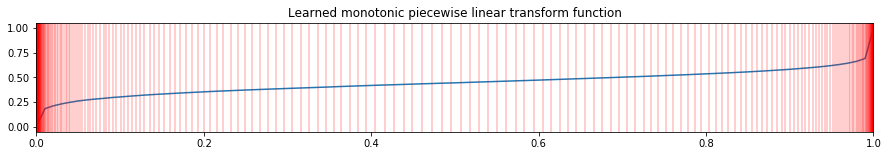

In [18]:
g.display_transform_function()

### Exponential distribution -> Gaussian distribution

In [19]:
# Generate random sample from exponential distribution
train_exp = np.random.exponential(size=30000)
valid_exp = np.random.exponential(size=5000)

# Normalize
train_exp = train_exp / np.max(train_exp)
valid_exp = valid_exp / np.max(valid_exp)

# Fitting the Gaussifier
g = Gaussifier()
g.fit(train_exp, nbins=0)
train_e_t = g.transform(train_exp)
valid_e_t = g.transform(valid_exp)

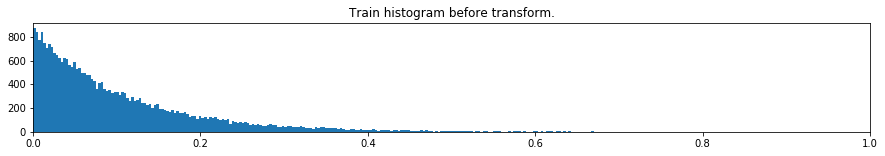

In [20]:
g.plot_hist(train_exp, g.nbins, title='Train histogram before transform.')  

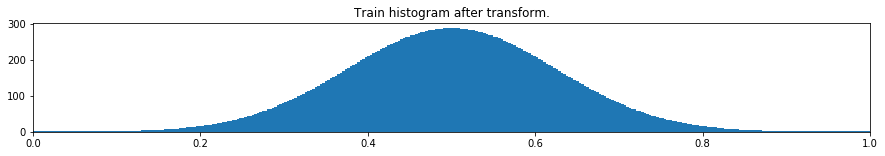

In [21]:
g.plot_hist(train_e_t, g.nbins, title='Train histogram after transform.') 

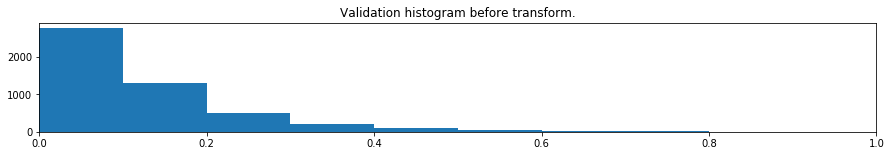

In [22]:
g.plot_hist(valid_exp, None, title='Validation histogram before transform.') 

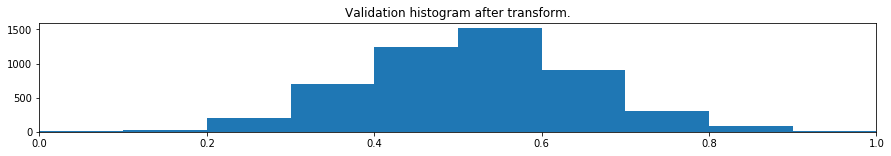

In [23]:
g.plot_hist(valid_e_t, None, title='Validation histogram after transform.') 

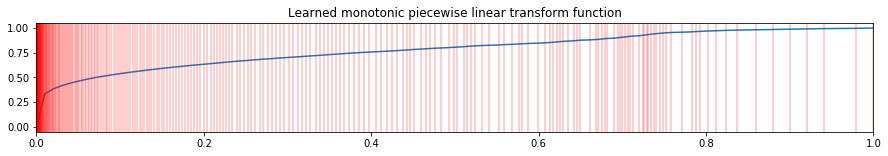

In [24]:
g.display_transform_function()